In [1]:
#import libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Front.xlsx to Front.xlsx


#### reading file and scaling all variables to 'z scores'

In [3]:
df = pd.read_excel('Front.xlsx')

In [4]:
# converting the submission time strings to epoch

df['Attempt Submission Time'] = pd.to_datetime(df['Attempt Submission Time'])
df['Attempt Submission Time']= df['Attempt Submission Time'].apply(lambda x: x.value)

the z score tells you how many "standard deviations" away the value is from the mean. z scores take into account the mean and std dev of the data, so they are useful for comparing datas from diff. distributions.

In [5]:
## creating z-score columns for grades, exam duration and submission time

df['grades_zscore'] = zscore(df['Grades'])
df['duration_zscore'] = zscore(df['Exam duration (Sec)'])
df['submtime_zscore'] = zscore(df['Attempt Submission Time'])

#### creating list of all the differences of the sums of z_scores (duration, grades and time)

In [6]:
## grades  exam_dur   submission time(example dataframe)
## 3       10           4 (epoch_scaled)
## 4       5            2
## 8       4            12
## ..      ..

# diff_of_grades has [(3-4),(3-8),...]
# diff_of_duration has [(10-5),(10-4),...]
# diff_of_submTime has [(4-2),(4-12),...]

diff_of_grades = [abs(a - b) for (a, b) in itertools.product(df['grades_zscore'], df['grades_zscore'])]
diff_of_duration = [abs(m - n) for (m, n) in itertools.product(df['duration_zscore'], df['duration_zscore'])]
diff_of_submTime = [abs(h - j) for (h, j) in itertools.product(df['submtime_zscore'], df['submtime_zscore'])]

In [7]:
grade_time_list = [x + y + z for x, y, z in zip(diff_of_grades, diff_of_duration, diff_of_submTime)] ## adding all the lists

## this list has [(3-4)+(10-5)+(4-2),..]

In [8]:
chunks = [grade_time_list[x:x+45] for x in range(0, len(grade_time_list), 45)]

# converting grade_time_list to a nested list
# where each nested list contains all the differences of a particular student with every other student

In [9]:
#chunks[0]  -> # student 1's difference with every other student
len(chunks)

45

In [10]:
name_list = df['Student'].to_list()
final_df = pd.DataFrame(chunks , columns=name_list, index = name_list)

# adding nested list to the dataframe and adding student names to column and row indexes

In [11]:
final_df.head(2) #checking if we're getting same values for both lower and upper triangular matrix

,MUHAMMED FAIES,Sai Akshay,MUHAMMED NA,VINAYAK K,ANJALI ARORA,Khwaja Nazamuddin,SIMRAN NA,DEEPESH KUMAR,VANDANA Tanwar,SHERAL NEGI,...,SANDHYA RAGHAV,SUDHIR NA,DISHA GUPTA,ADITI SUKHIJA,MOHD IQRAR,VIKAS NA,TANNU NA,SOORAJ SUDHAKARAN,SARGAM KAPOOR,Krishnamoni Das
MUHAMMED FAIES,0.000000,2.172514,2.798902,4.804436,5.675147,6.139981,7.099943,5.653342,6.887453,4.443475,...,5.953790,5.918218,6.041339,6.089615,6.204476,5.628490,7.655090,5.939605,6.550841,9.342297
Sai Akshay,2.172514,0.000000,0.931291,3.892185,3.502633,4.897531,4.927429,4.669947,4.714939,5.837149,...,3.781276,3.745704,5.727559,5.775836,5.480249,4.386041,5.482576,5.625825,5.308392,7.169783


In [12]:
#instead of converting all the values of lower triangular matrix to zero, we convert them to NaN.

print(np.triu(np.ones(final_df.shape)).astype(np.bool))
final_df = final_df.where(np.triu(np.ones(final_df.shape)).astype(np.bool))

[[ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [False False  True ...  True  True  True]
 ...
 [False False False ...  True  True  True]
 [False False False ... False  True  True]
 [False False False ... False False  True]]


<ipython-input-12-863451eb2b87>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(np.triu(np.ones(final_df.shape)).astype(np.bool))
<ipython-input-12-863451eb2b87>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  final_df = final_df.where(np.triu(np.ones(final_df.shape)).astype(np.bool))


#### Visualization

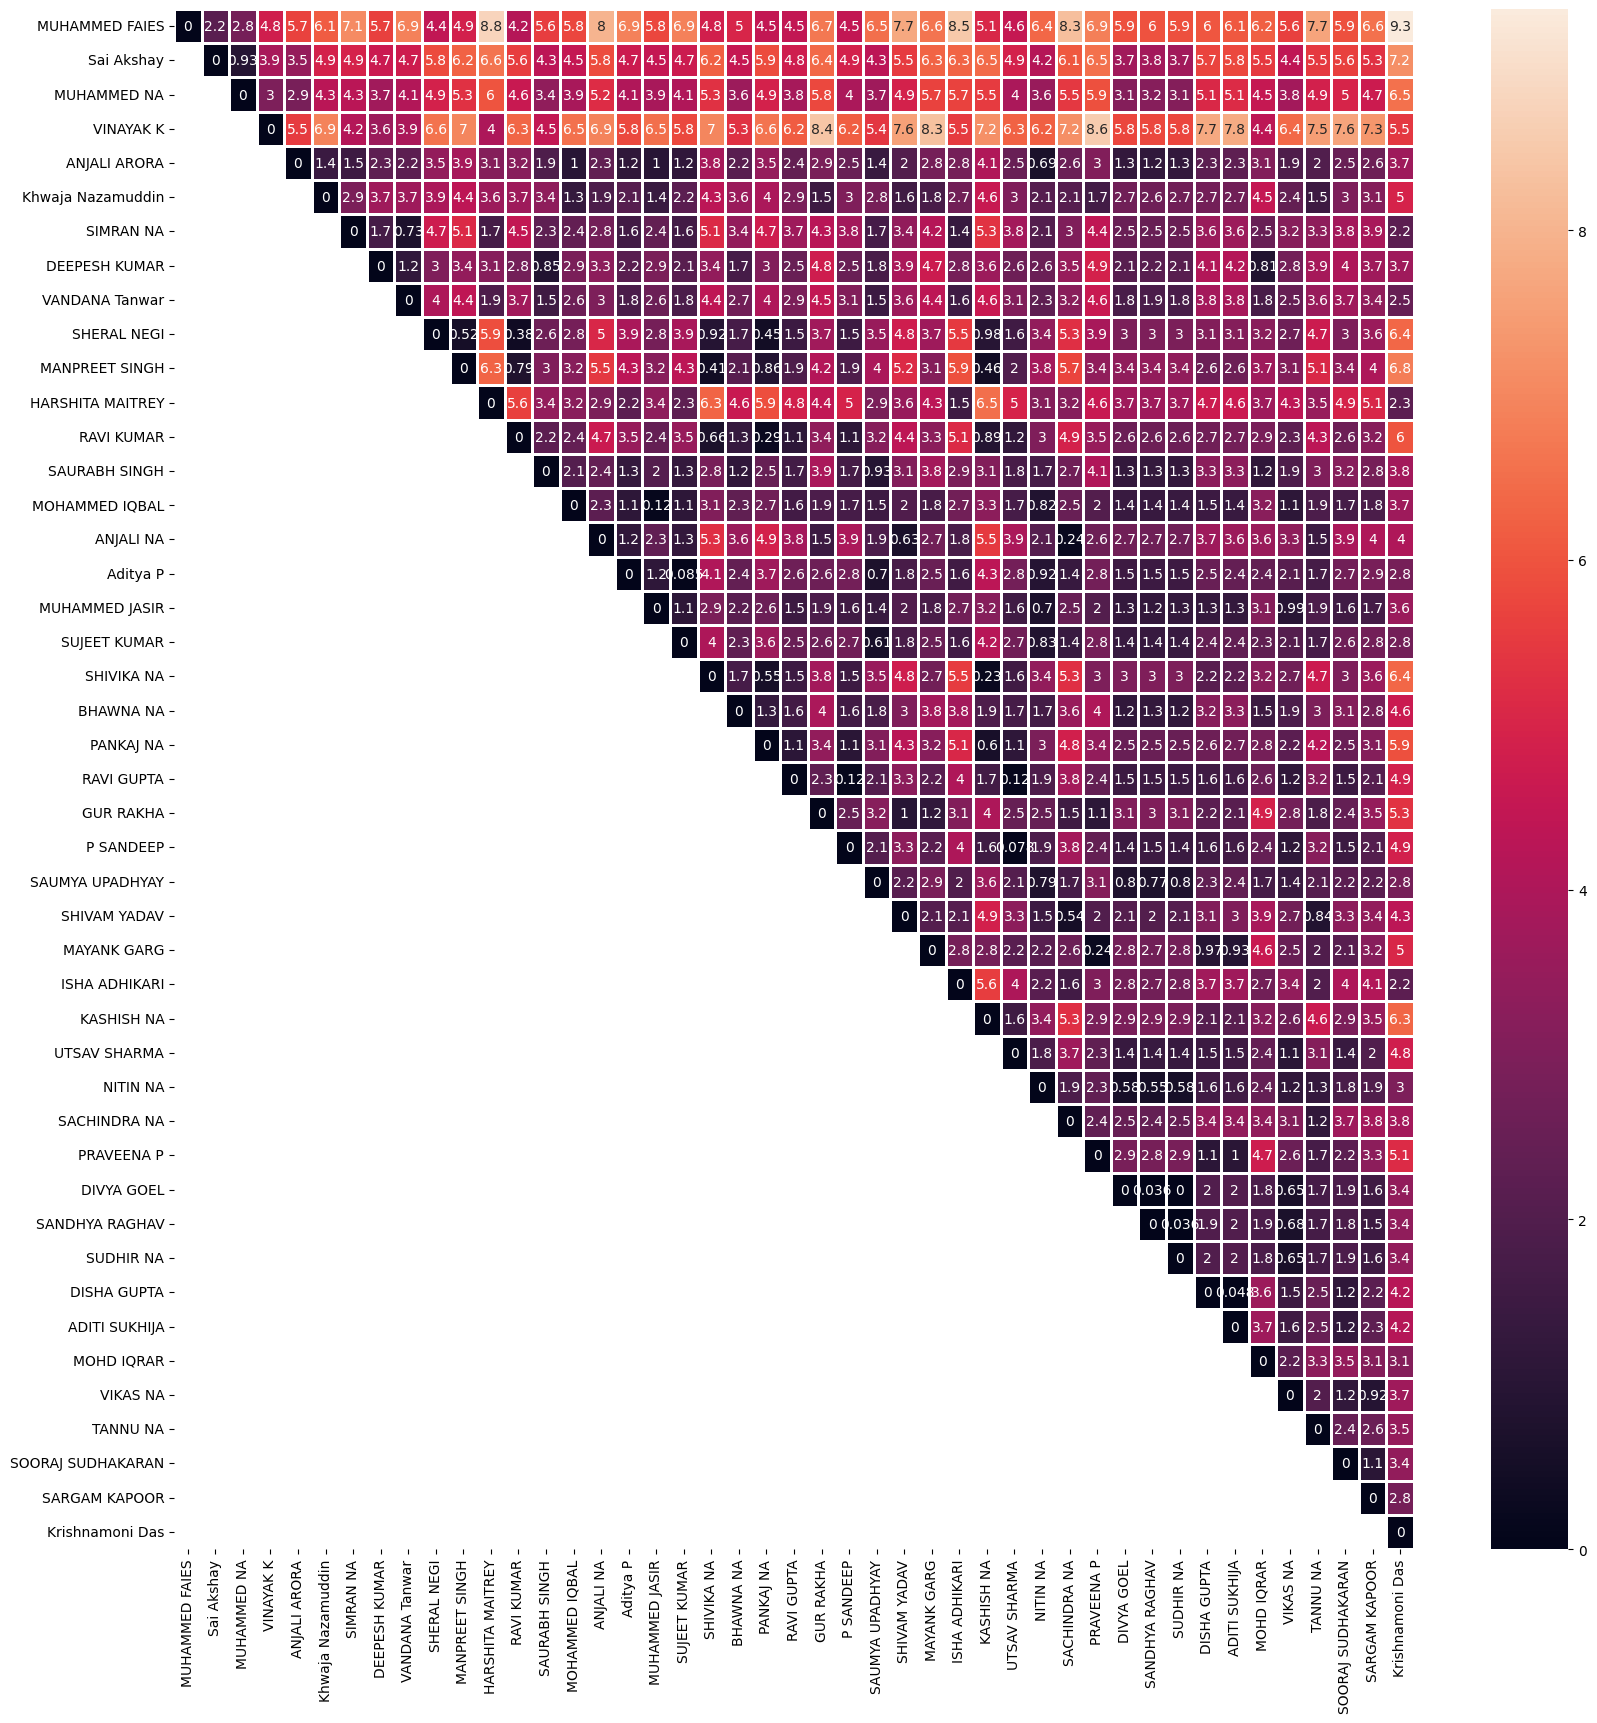

In [13]:
# making a heatmap
fig, ax = plt.subplots(figsize=(20,20))
hmap = sns.heatmap(final_df, annot=True, linewidths=1, ax=ax)

# to view the heatmap better, click on the three dots of this cell, right top hand corner and click on "view output cell in fullscreen".
hmap.figure.savefig("Correlation_Heatmap.png",
                    format='png',
                    dpi=600)

In [14]:
# move to long form
long_form = final_df.unstack()

# rename columns and turn into a dataframe
long_form.index.rename(['Student A', 'Student B'], inplace=True)
long_form = long_form.to_frame('Euclidean').reset_index()

In [15]:
# printing only relevant values
x=long_form[
    (long_form['Euclidean'] < 0.1248472880195801)
    & (long_form['Student A'] != long_form['Student B'])]
x.sort_values(by=['Euclidean'])

,Student A,Student B,Euclidean
1654,SUDHIR NA,DIVYA GOEL,0.000000
1609,SANDHYA RAGHAV,DIVYA GOEL,0.035572
1655,SUDHIR NA,SANDHYA RAGHAV,0.035572
1747,ADITI SUKHIJA,DISHA GUPTA,0.048276
1374,UTSAV SHARMA,P SANDEEP,0.077975
826,SUJEET KUMAR,Aditya P,0.084546
1102,P SANDEEP,RAVI GUPTA,0.118801
1372,UTSAV SHARMA,RAVI GUPTA,0.120550
